In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load agonist and non-agonist molecular properties data from CSV files
positive_data = pd.read_csv('../data/gaba_MolecularProperties.csv')[:244]
negative_data = pd.read_csv('../data/gaba_MolecularProperties.csv')[244:]

In [3]:
positive_data

,Unnamed: 0,smiles,weight,logp,rotatable_bonds,tpsa,rings,AroRings,h_donors,h_acceptors
0,0,C(CC(=O)O)CN,103.121,-0.19010,3,63.32,0,0,2,2
1,1,CC1CCC(C(C1)O)C(C)C,156.269,2.43950,1,20.23,1,0,1,1
2,2,CCC1(C(=O)NC(=O)NC1=O)C2=CC=CC=C2,232.239,0.70040,2,75.27,2,1,2,3
3,3,C1CNCC2C1(O2)C(=O)O,143.142,-0.79810,1,61.86,2,0,2,3
4,4,CC1=C(CCCl)SC=N1,161.657,2.23282,2,12.89,1,1,0,2
...,...,...,...,...,...,...,...,...,...,...
239,239,CC1=CC(=C(C(=C1)O)C)C,136.194,2.31746,0,20.23,1,1,1,1
240,240,CC(=O)OC1=C(C=C(C=C1)CC=C)OC,206.241,2.34900,4,35.53,1,1,0,3
241,241,CCOC(=O)C1=C(NC(=S)NC1C2=CC(=CC=C2)O)C,292.360,1.74810,3,70.59,2,1,3,4
242,242,CC(C)(C)C1=CC2=NN=C(N2N=C1OCC3=NC=NN3C)C4=C(C=...,399.405,3.07450,4,83.02,4,4,0,8


In [4]:
negative_data

,Unnamed: 0,smiles,weight,logp,rotatable_bonds,tpsa,rings,AroRings,h_donors,h_acceptors
244,244,C1C(C(OC2=CC(=CC(=C21)O)O)C3=CC(=C(C(=C3)O)O)O...,458.375,2.23320,3,197.37,4,3,8,11
245,245,C1C(C(OC2=CC(=CC(=C21)O)O)C3=CC(=C(C=C3)O)O)OC...,442.376,2.52760,3,177.14,4,3,7,10
246,246,C1=CC(=C(C=C1C2=CC(=O)C3=C(C=C(C=C3O2)O)O)O)O,286.239,2.28240,1,111.13,3,3,4,6
247,247,C1=CC=C(C=C1)C2=CC(=O)C3=C(C=C(C=C3O2)O)O,254.241,2.87120,1,70.67,3,3,2,4
248,248,CP(=O)([O-])OCCN.C(=O)(C(F)(F)F)O,252.105,-0.22180,3,112.68,0,0,2,5
...,...,...,...,...,...,...,...,...,...,...
483,483,C1C(C(C(CC1(C(=O)O)O)OC(=O)C=CC2=CC(=C(C=C2)O)...,354.311,-0.64590,4,164.75,2,1,6,8
484,484,CC1=C(C(=O)C=CO1)O,126.111,0.65382,0,50.44,1,1,1,3
485,485,CN1C=NC2=C1C(=O)NC(=O)N2C,180.167,-1.03970,0,72.68,2,2,1,5
486,486,CN1C2=C(C(=O)N(C1=O)C)NC=N2,180.167,-1.03970,0,72.68,2,2,1,5


In [5]:
# Extract relevant columns (properties) from the agonist and non-agonist data
positive_wt = positive_data['weight'].tolist()
negative_wt = negative_data['weight'].tolist()
positive_lp = positive_data['logp'].tolist()
negative_lp = negative_data['logp'].tolist()
positive_rb = positive_data['rotatable_bonds'].tolist()
negative_rb = negative_data['rotatable_bonds'].tolist()
positive_tpsa = positive_data['tpsa'].tolist()
negative_tpsa = negative_data['tpsa'].tolist()
positive_r = positive_data['rings'].tolist()
negative_r = negative_data['rings'].tolist()
positive_ar = positive_data['AroRings'].tolist()
negative_ar = negative_data['AroRings'].tolist()
positive_hd = positive_data['h_donors'].tolist()
negative_hd = negative_data['h_donors'].tolist()
positive_ha = positive_data['h_acceptors'].tolist()
negative_ha = negative_data['h_acceptors'].tolist()

In [6]:
# Organize the data into DataFrame format for plotting
data1 = {'Molecular Weight': ['Positive'] * len(positive_wt) + ['Negative'] * len(negative_wt),
        'Value': positive_wt + negative_wt}
data2 = {'Logarithm of the Partition Coefficient': ['Positive'] * len(positive_lp) + ['Negative'] * len(negative_lp),
        'Value': positive_lp + negative_lp}
data3 = {'Rotatable bonds': ['Positive'] * len(positive_rb) + ['Negative'] * len(negative_rb),
        'Value': positive_rb + negative_rb}
data4 = {'Topological Polar Surface Area': ['Positive'] * len(positive_tpsa) + ['Negative'] * len(negative_tpsa),
        'Value': positive_tpsa + negative_tpsa}
data5 = {'Number of Rings': ['Positive'] * len(positive_r) + ['Negative'] * len(negative_r),
        'Value': positive_r + negative_r}
data6 = {'Number of Aromatic Rings': ['Positive'] * len(positive_ar) + ['Negative'] * len(negative_ar),
        'Value': positive_ar + negative_ar}
data7 = {'Hydrogen Bond Donors': ['Positive'] * len(positive_hd) + ['Negative'] * len(negative_hd),
         'Value': positive_hd + negative_hd}
data8 = {'Hydrogen Bond Acceptors': ['Positive'] * len(positive_ha) + ['Negative'] * len(negative_ha),
        'Value': positive_ha + negative_ha}

# Convert the data dictionaries to DataFrames
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)
df3 = pd.DataFrame(data3)
df4 = pd.DataFrame(data4)
df5 = pd.DataFrame(data5)
df6 = pd.DataFrame(data6)
df7 = pd.DataFrame(data7)
df8 = pd.DataFrame(data8)

# box plots

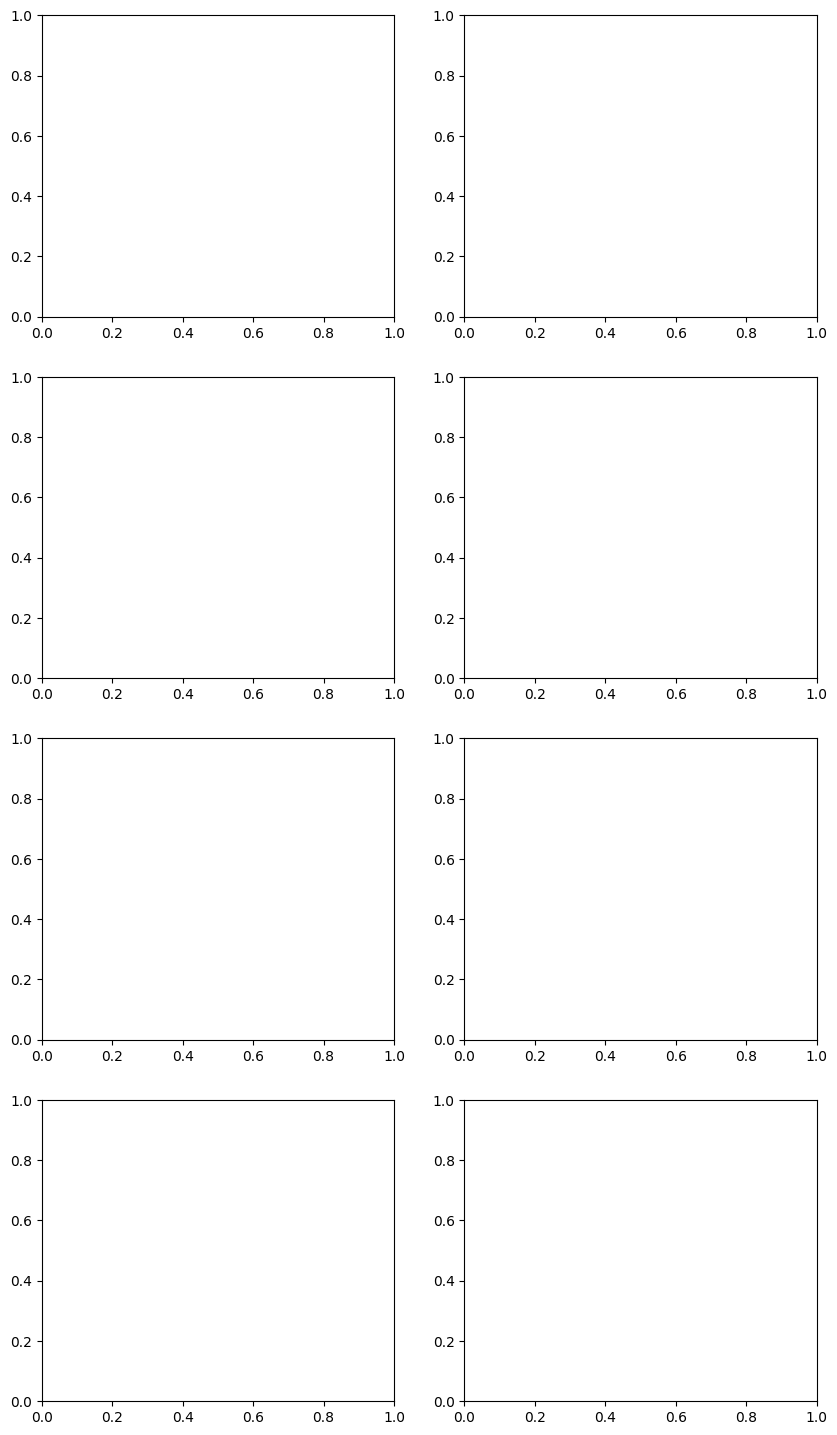

In [7]:
fig_box, axes_box = plt.subplots(4, 2, figsize=(10, 18))

In [9]:
sns.boxplot(x='Molecular Weight', y='Value', data=df1, ax=axes_box[0][0],showfliers=False)
sns.boxplot(x='Logarithm of the Partition Coefficient', y='Value', data=df2, ax=axes_box[0][1],showfliers=False)
sns.boxplot(x='Rotatable bonds', y='Value', data=df3, ax=axes_box[1][0],showfliers=False)
sns.boxplot(x='Topological Polar Surface Area', y='Value', data=df4, ax=axes_box[1][1],showfliers=False)
sns.boxplot(x='Number of Rings', y='Value', data=df5, ax=axes_box[2][0],showfliers=False)
sns.boxplot(x='Number of Aromatic Rings', y='Value', data=df6, ax=axes_box[2][1],showfliers=False)
sns.boxplot(x='Hydrogen Bond Donors', y='Value', data=df7, ax=axes_box[3][0],showfliers=False)
sns.boxplot(x='Hydrogen Bond Acceptors', y='Value', data=df8, ax=axes_box[3][1],showfliers=False)

<Axes: xlabel='Hydrogen Bond Acceptors', ylabel='Value'>

In [10]:

# Remove y-axis labels from all subplots
for i in range(4):
    for j in range(2):
        axes_box[i][j].set_ylabel('')

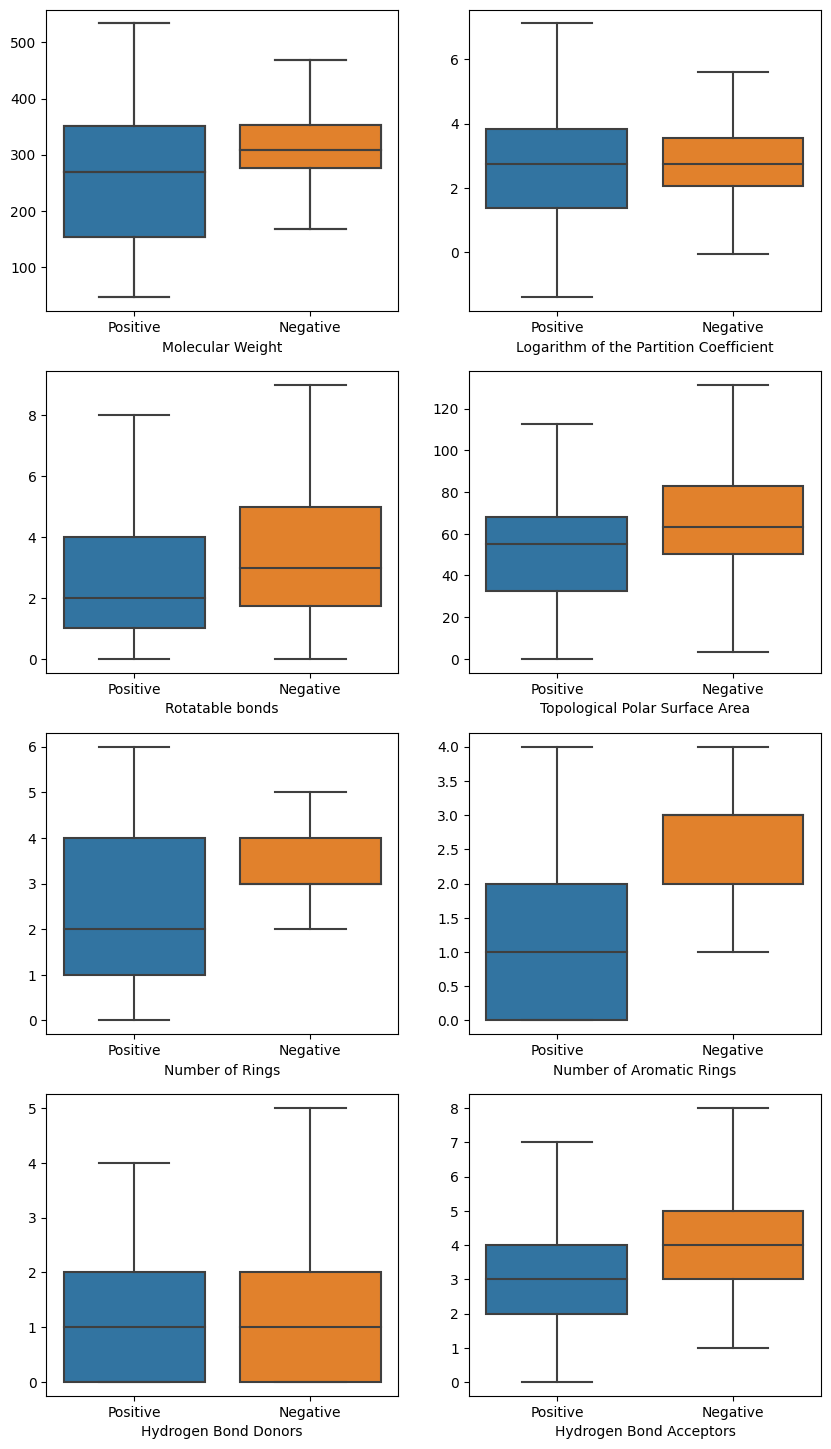

In [11]:
fig_box

# Violin diagram

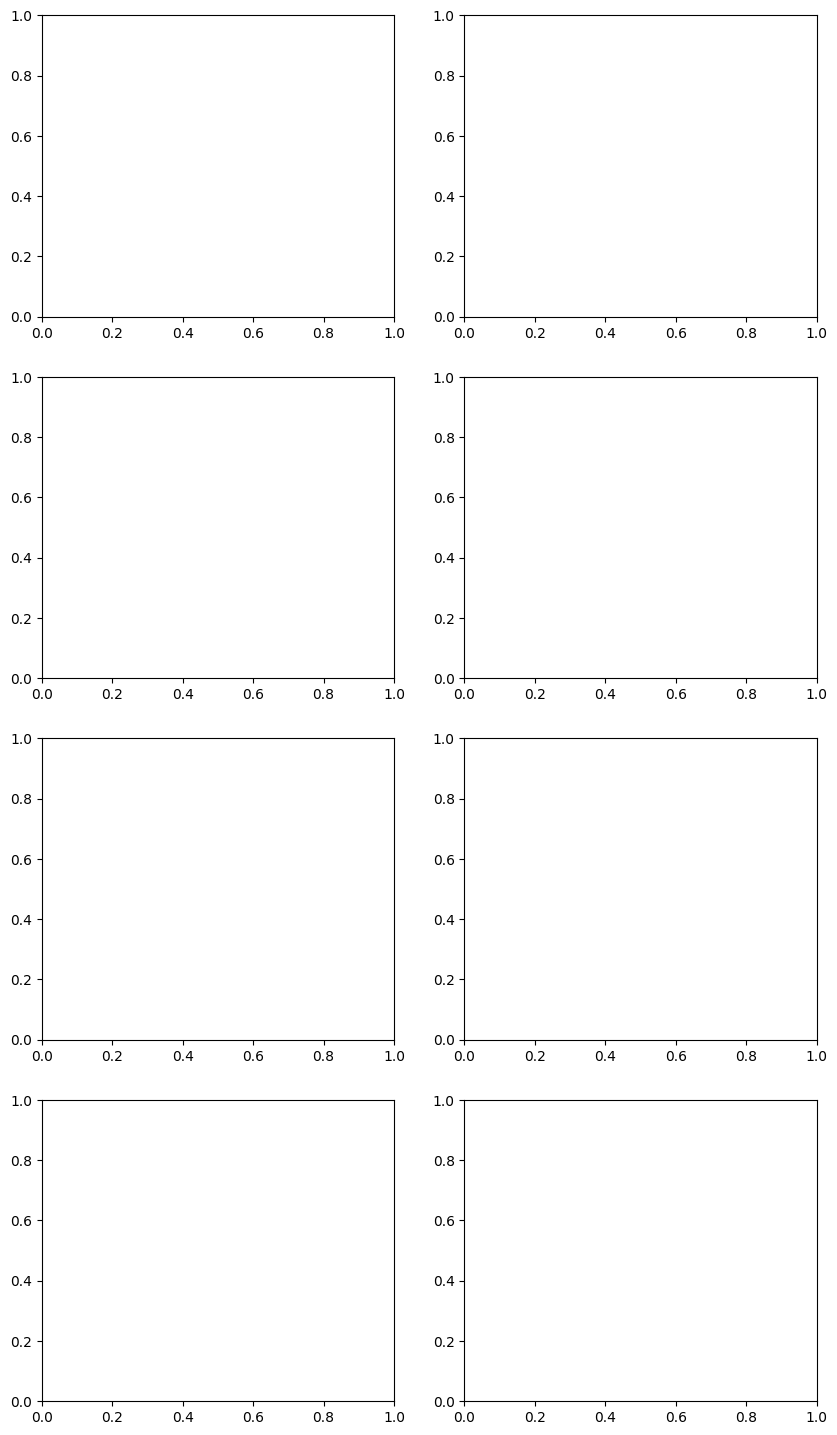

In [12]:
fig_violin, axes_violin = plt.subplots(4, 2, figsize=(10, 18))

In [13]:
sns.violinplot(x='Molecular Weight', y='Value', data=df1, ax=axes_violin[0][0],showfliers=False)
sns.violinplot(x='Logarithm of the Partition Coefficient', y='Value', data=df2, ax=axes_violin[0][1],showfliers=False)
sns.violinplot(x='Rotatable bonds', y='Value', data=df3, ax=axes_violin[1][0],showfliers=False)
sns.violinplot(x='Topological Polar Surface Area', y='Value', data=df4, ax=axes_violin[1][1],showfliers=False)
sns.violinplot(x='Number of Rings', y='Value', data=df5, ax=axes_violin[2][0],showfliers=False)
sns.violinplot(x='Number of Aromatic Rings', y='Value', data=df6, ax=axes_violin[2][1],showfliers=False)
sns.violinplot(x='Hydrogen Bond Donors', y='Value', data=df7, ax=axes_violin[3][0],showfliers=False)
sns.violinplot(x='Hydrogen Bond Acceptors', y='Value', data=df8, ax=axes_violin[3][1],showfliers=False)

<Axes: xlabel='Hydrogen Bond Acceptors', ylabel='Value'>

In [14]:
# Remove y-axis labels from all subplots
for i in range(4):
    for j in range(2):
        axes_violin[i][j].set_ylabel('')

In [21]:
plt.rcParams['figure.dpi'] = 1200 

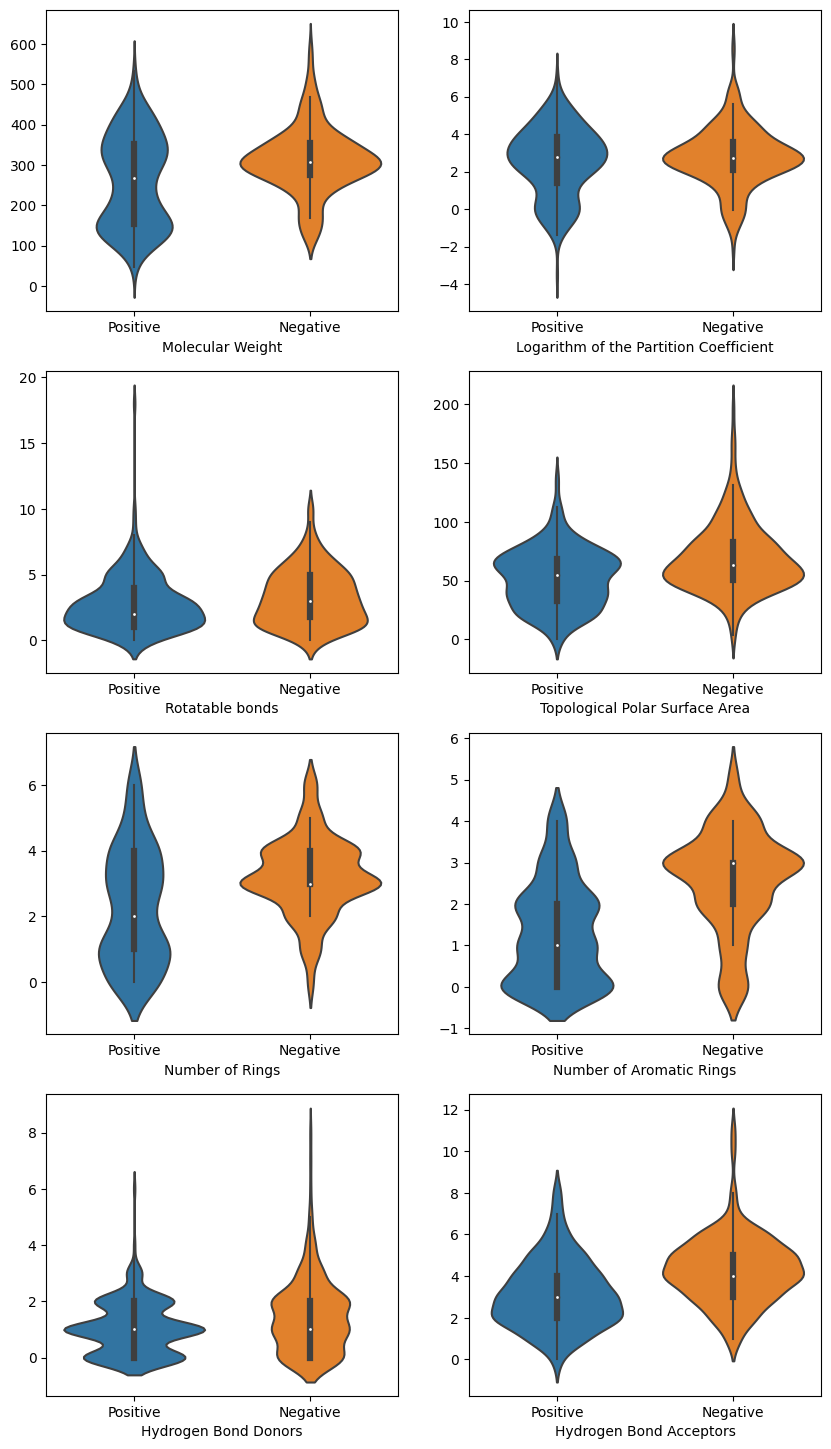

In [22]:
fig_violin

In [20]:
fig_violin.savefig('MolecularProperties', dpi=900)